In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:

data2 = pd.read_csv('Original.csv')
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Date'] = data2['Date'].apply(lambda x: dt.datetime.strftime(x, '%d-%m-%Y %H:%M'))
data2.index = pd.DatetimeIndex(data2.Date)
data2 = data2.drop('Date',axis=1)
data2 = data2[:247]
temp = np.float64(data2)

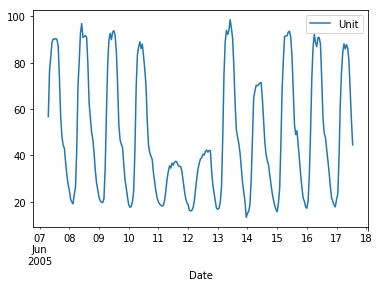

In [3]:
data2.plot()
plt.savefig('month_electricity_consumption.png', bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

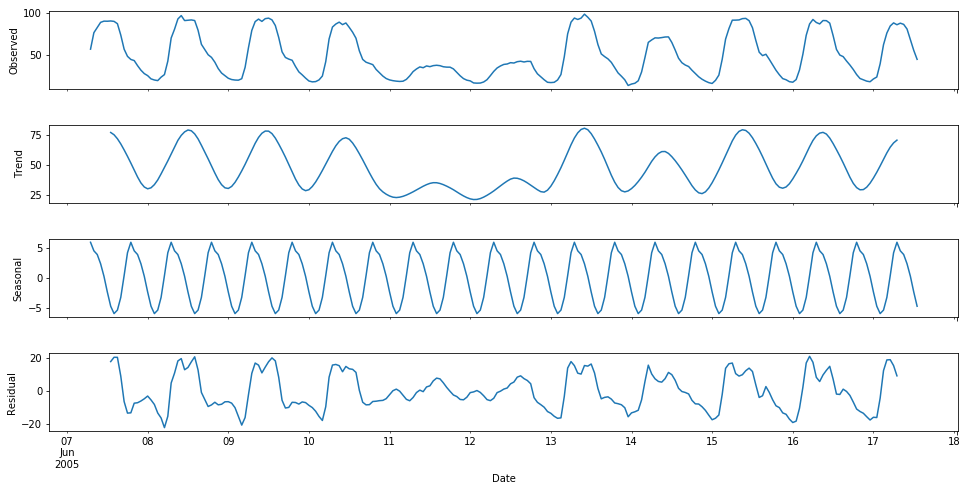

In [4]:
decomposition = seasonal_decompose(data2, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

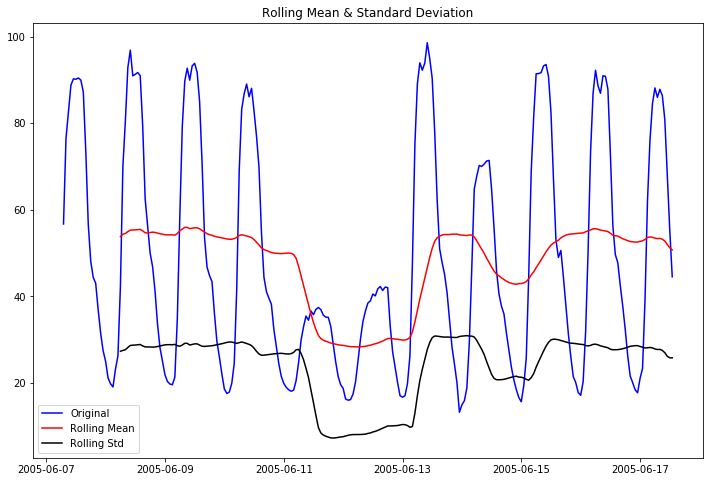

Results of Dickey-Fuller Test:
Test Statistic                  -2.741249
p-value                          0.067168
#Lags Used                      14.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


In [6]:
test_stationarity(data2.Unit)

C:\Users\abhij\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


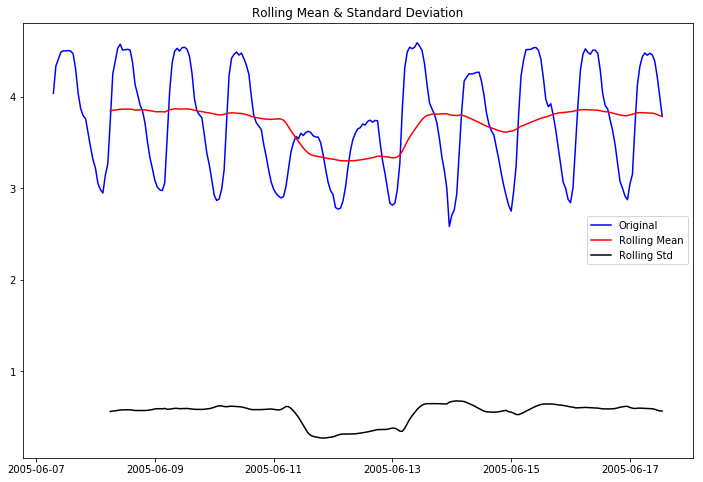

Results of Dickey-Fuller Test:
Test Statistic                  -3.309401
p-value                          0.014463
#Lags Used                      14.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


In [7]:
data2.Unit_log= data2.Unit.apply(lambda x: np.log(x))  
test_stationarity(data2.Unit_log)

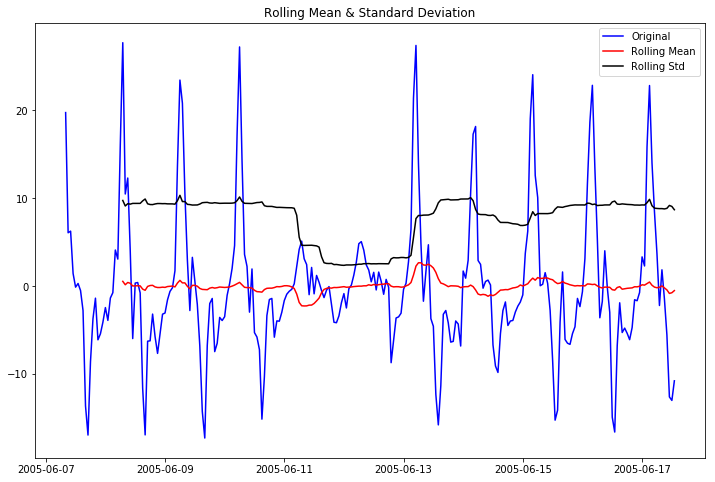

Results of Dickey-Fuller Test:
Test Statistic                -9.202011e+00
p-value                        1.990362e-15
#Lags Used                     1.600000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [8]:
data2['first_difference'] = data2.Unit - data2.Unit.shift(1)  
test_stationarity(data2.first_difference.dropna(inplace=False))

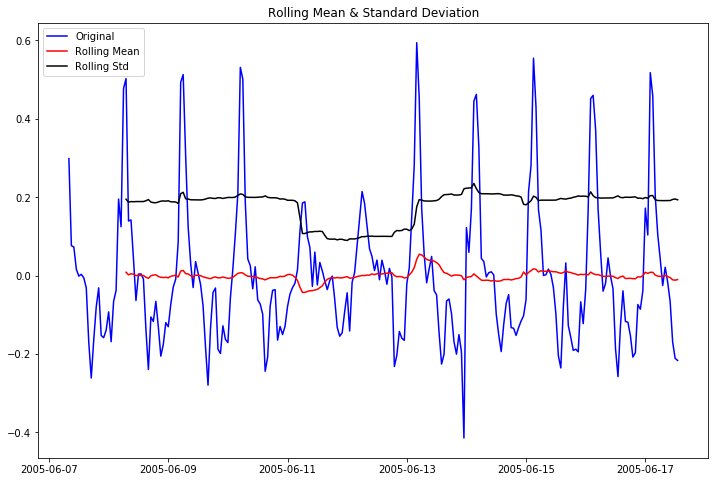

Results of Dickey-Fuller Test:
Test Statistic                -9.567991e+00
p-value                        2.329053e-16
#Lags Used                     1.600000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [9]:
data2['log_first_difference'] = data2.Unit_log - data2.Unit_log.shift(1)  
test_stationarity(data2.log_first_difference.dropna(inplace=False))

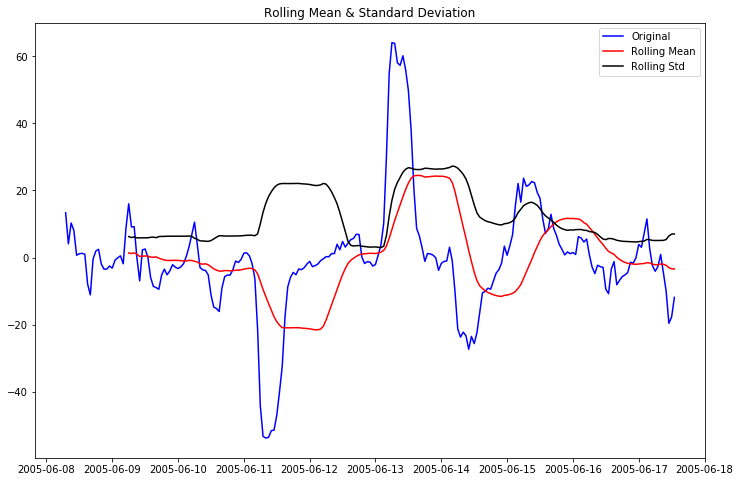

Results of Dickey-Fuller Test:
Test Statistic                  -3.045578
p-value                          0.030852
#Lags Used                      12.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


In [10]:
data2['seasonal_difference'] = data2.Unit - data2.Unit.shift(24)  
test_stationarity(data2.seasonal_difference.dropna(inplace=False))

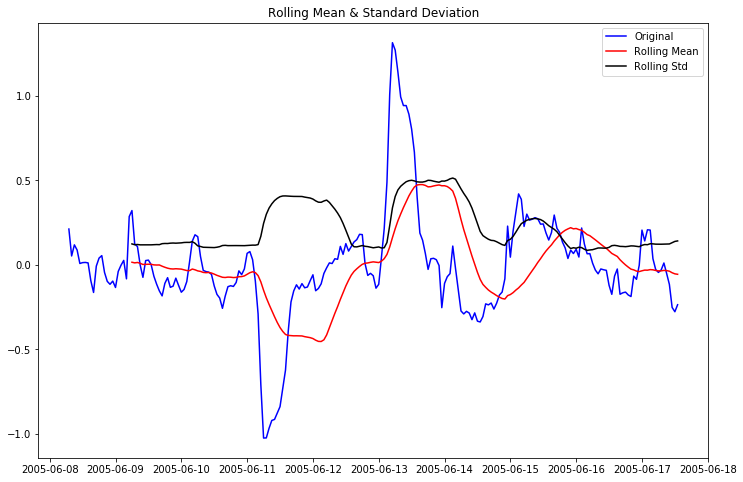

Results of Dickey-Fuller Test:
Test Statistic                  -3.482758
p-value                          0.008441
#Lags Used                       1.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


In [11]:
data2['log_seasonal_difference'] = data2.Unit_log - data2.Unit_log.shift(24)  
test_stationarity(data2.log_seasonal_difference.dropna(inplace=False))

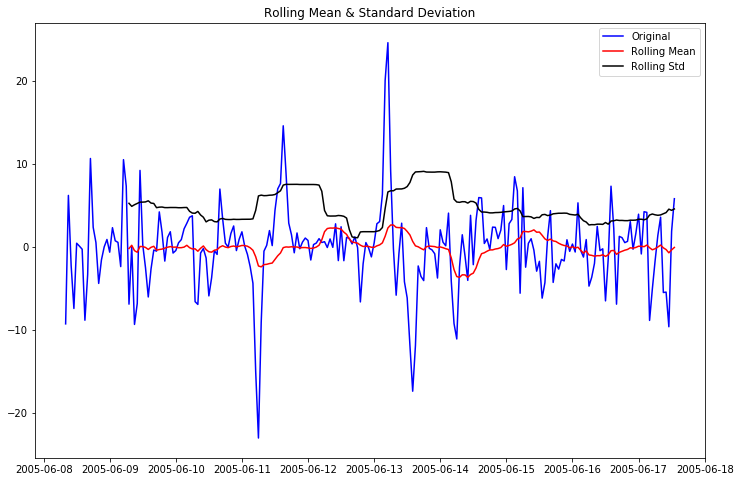

Results of Dickey-Fuller Test:
Test Statistic                -7.479717e+00
p-value                        4.808129e-11
#Lags Used                     8.000000e+00
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


In [12]:
data2['seasonal_first_difference'] = data2.first_difference - data2.first_difference.shift(24)  
test_stationarity(data2.seasonal_first_difference.dropna(inplace=False))

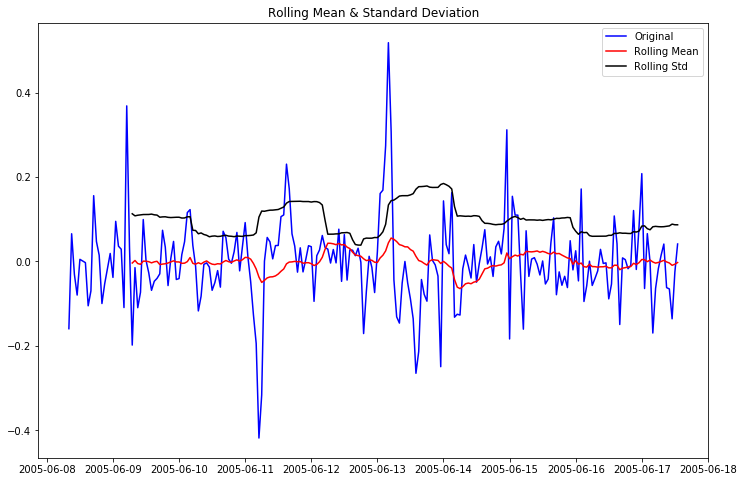

Results of Dickey-Fuller Test:
Test Statistic                -6.401299e+00
p-value                        1.992479e-08
#Lags Used                     8.000000e+00
Number of Observations Used    2.130000e+02
Critical Value (1%)           -3.461429e+00
Critical Value (5%)           -2.875207e+00
Critical Value (10%)          -2.574054e+00
dtype: float64


In [13]:
data2['log_seasonal_first_difference'] = data2.log_first_difference - data2.log_first_difference.shift(24)  
test_stationarity(data2.log_seasonal_first_difference.dropna(inplace=False))

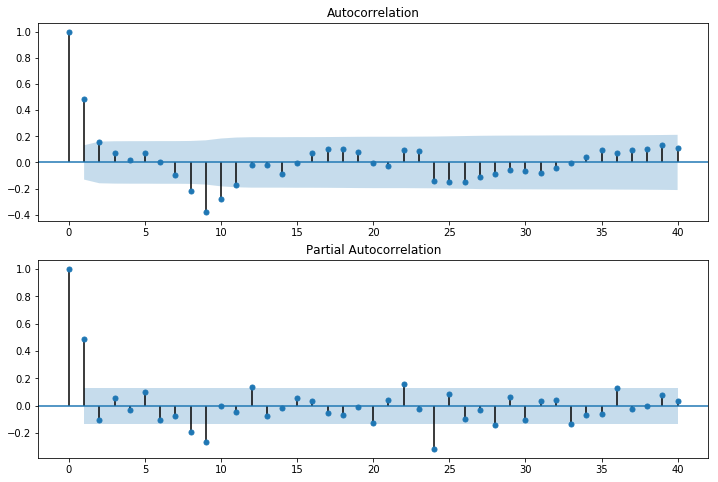

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data2.seasonal_first_difference.iloc[25:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data2.seasonal_first_difference.iloc[25:], lags=40, ax=ax2)
plt.show()

In [15]:
mod = sm.tsa.statespace.SARIMAX(data2.Unit, trend='n', order=(2,1,0), seasonal_order=(1,1,0,24))
results = mod.fit()
print(results.summary())


C:\Users\abhij\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                               Unit   No. Observations:                  247
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 24)   Log Likelihood                -640.511
Date:                            Sat, 30 Jun 2018   AIC                           1289.021
Time:                                    18:20:34   BIC                           1302.632
Sample:                                06-07-2005   HQIC                          1294.516
                                     - 06-17-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5892      0.053     11.199      0.000       0.486       0.692
ar.L2         -0.1405      0.072   

Date
2005-06-15 15:00:00    48.985931
2005-06-15 16:00:00    50.608884
2005-06-15 17:00:00    44.561929
2005-06-15 18:00:00    38.084116
2005-06-15 19:00:00    31.477407
2005-06-15 20:00:00    26.095179
2005-06-15 21:00:00    21.487257
2005-06-15 22:00:00    20.103155
2005-06-15 23:00:00    17.787623
2005-06-16 00:00:00    17.164686
Name: Unit, dtype: float64
---
Date
2005-06-15 15:00:00    45.339663
2005-06-15 16:00:00    42.331845
2005-06-15 17:00:00    40.352737
2005-06-15 18:00:00    36.013333
2005-06-15 19:00:00    31.493123
2005-06-15 20:00:00    27.025529
2005-06-15 21:00:00    23.844389
2005-06-15 22:00:00    21.083163
2005-06-15 23:00:00    18.059425
2005-06-16 00:00:00    17.741671
Name: forecast, dtype: float64


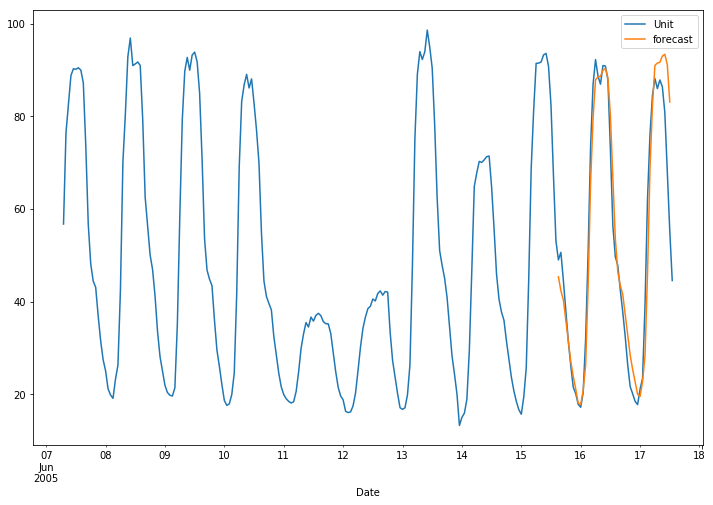

In [16]:
data2['forecast'] = results.predict(start = 200, end= 245, dynamic= True)  
data2[['Unit', 'forecast']].plot(figsize=(12, 8)) 
print(data2.Unit[200:210])
print("---")
print(data2.forecast[200:210])
plt.savefig('Unit_predict.png', bbox_inches='tight')
plt.show()

In [17]:
import pickle
filename = 'model.pk'
with open(r'C:\users\abhij\Desktop\Amdocs\\' + filename,'wb') as file:
     pickle.dump(results,file)

In [18]:
with open(r'C:\users\abhij\Desktop\Amdocs\\' + 'actual','wb') as file:
     pickle.dump(data2['Unit'],file)

In [19]:
with open(r'C:\users\abhij\Desktop\Amdocs\\' + filename,'rb') as file:
         loaded_model = pickle.load(file)

In [20]:
prediction = loaded_model.predict(start = 200, end= 247, dynamic= True)
print(prediction)

2005-06-15 15:00:00    45.339663
2005-06-15 16:00:00    42.331845
2005-06-15 17:00:00    40.352737
2005-06-15 18:00:00    36.013333
2005-06-15 19:00:00    31.493123
2005-06-15 20:00:00    27.025529
2005-06-15 21:00:00    23.844389
2005-06-15 22:00:00    21.083163
2005-06-15 23:00:00    18.059425
2005-06-16 00:00:00    17.741671
2005-06-16 01:00:00    20.782859
2005-06-16 02:00:00    26.240431
2005-06-16 03:00:00    43.193199
2005-06-16 04:00:00    65.575563
2005-06-16 05:00:00    79.537670
2005-06-16 06:00:00    87.854642
2005-06-16 07:00:00    88.507247
2005-06-16 08:00:00    88.623955
2005-06-16 09:00:00    89.920487
2005-06-16 10:00:00    90.333152
2005-06-16 11:00:00    88.281681
2005-06-16 12:00:00    80.312183
2005-06-16 13:00:00    66.604501
2005-06-16 14:00:00    53.570260
2005-06-16 15:00:00    46.396108
2005-06-16 16:00:00    43.448606
2005-06-16 17:00:00    41.517024
2005-06-16 18:00:00    37.148438
2005-06-16 19:00:00    32.767994
2005-06-16 20:00:00    28.442413
2005-06-16

In [21]:
with open(r'C:\users\abhij\Desktop\Amdocs\\' + 'actual','rb') as file:
         loaded_model = pickle.load(file)

In [22]:
print(loaded_model)

Date
2005-06-07 07:00:00    56.718587
2005-06-07 08:00:00    76.456163
2005-06-07 09:00:00    82.534038
2005-06-07 10:00:00    88.796995
2005-06-07 11:00:00    90.247922
2005-06-07 12:00:00    90.146117
2005-06-07 13:00:00    90.457411
2005-06-07 14:00:00    89.967661
2005-06-07 15:00:00    87.211742
2005-06-07 16:00:00    73.610635
2005-06-07 17:00:00    56.695326
2005-06-07 18:00:00    48.110602
2005-06-07 19:00:00    44.406879
2005-06-07 20:00:00    43.050199
2005-06-07 21:00:00    36.961509
2005-06-07 22:00:00    31.555023
2005-06-07 23:00:00    27.467343
2005-06-08 00:00:00    25.041833
2005-06-08 01:00:00    21.160963
2005-06-08 02:00:00    19.820359
2005-06-08 03:00:00    19.088173
2005-06-08 04:00:00    23.204098
2005-06-08 05:00:00    26.290215
2005-06-08 06:00:00    42.380698
2005-06-08 07:00:00    70.062697
2005-06-08 08:00:00    80.545780
2005-06-08 09:00:00    92.844296
2005-06-08 10:00:00    96.880965
2005-06-08 11:00:00    90.932928
2005-06-08 12:00:00    91.291134
     